# Optimized Reward Functions

## Position reward based upon approach course

This reward gives a higher reward the closer the airplane gets on approach course inbound to the FAF

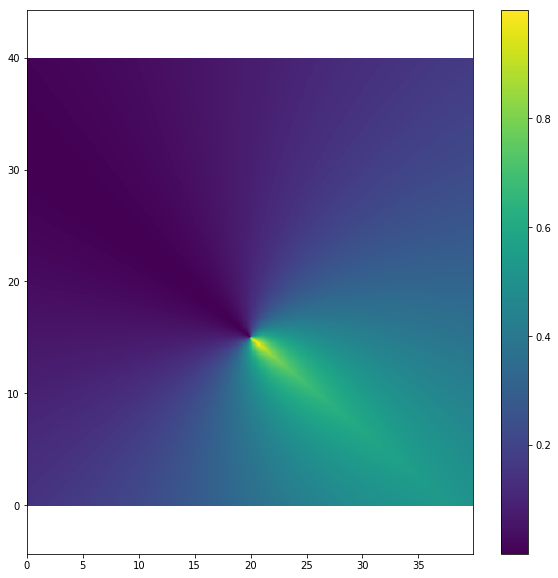

In [229]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

#public static int distance(int alpha, int beta) {
#        int phi = Math.abs(beta - alpha) % 360;       // This is either the distance or 360 - distance
#        int distance = phi > 180 ? 360 - phi : phi;
#        return distance;
#    }

def relative_angle(angle1, angle2):
    return (angle2 - angle1 + 180) % 360 - 180

def f_reward(x, y):
    to_rwy_x = x_runway -x
    t_rwy_y = y_runway - y
    
    to_faf_x = x_faf - x
    to_faf_y = y_faf - y
    d_faf = np.hypot(to_faf_x, to_faf_y)
    d_rwy = np.hypot(to_rwy_x, t_rwy_y)
    
    reward_faf = 1/np.maximum(np.power(d_faf, 0.2),1)
    reward_rwy = 1/np.maximum(np.power(d_rwy, 0.1),1)
    
    angle_rwy = np.abs(np.degrees(np.arctan2(to_rwy_x, t_rwy_y)))
    angle_faf = np.degrees(np.arctan2(to_faf_x, to_faf_y))
    
    angle_rwy_rel = relative_angle(phi_runway, angle_rwy)
    
    reward_angle_rwy = 1 - np.abs(np.degrees(np.arctan2(to_rwy_x, t_rwy_y)))/180 * 1/np.maximum(np.power(d_faf, 0.5),1)
    reward_angle_faf = 1 - np.abs(np.degrees(np.arctan2(to_faf_x, to_faf_y)))/180 * 1/np.maximum(np.power(d_faf, 0.5),1)
    reward_app_sector = np.power(1 - np.abs(relative_angle(phi_runway, angle_faf))/180, 1.5)
    
    reward = reward_app_sector * reward_faf
    
    return reward

x_faf = 20
y_faf = 15

phi_runway = 130+180
x_runway = 20
y_runway = 20

x = np.arange(0, 40, 0.1)
y = np.arange(0, 40, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = f_reward(xx, yy)

plt.figure(figsize=(10,10))
plt.pcolormesh(x,y,z)
plt.colorbar()
ax = plt.gca()
ax.set_aspect('equal', 'datalim')
plt.show()


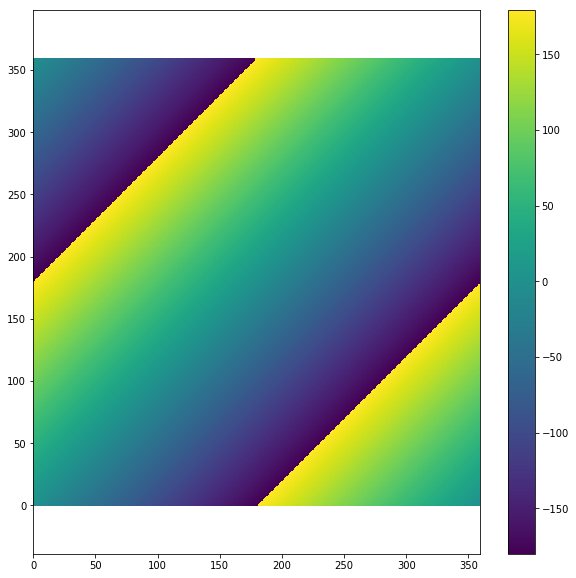

In [261]:
x = np.arange(0, 360, 1)
y = np.arange(0, 360, 1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = relative_angle(xx, yy)
#z = np.abs(z)

plt.figure(figsize=(10,10))
plt.pcolormesh(x,y,z)
plt.colorbar()
ax = plt.gca()
ax.set_aspect('equal', 'datalim')
plt.show()


In [238]:
relative_angle(90, 220)

130

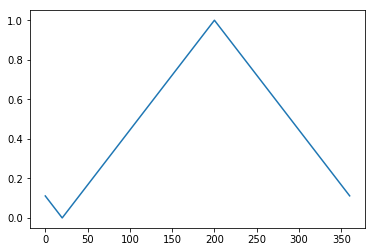

In [244]:
x = np.arange(0, 360, 0.1)
y = np.abs(relative_angle(20, x))/180

plt.plot(x, y)
plt.show()

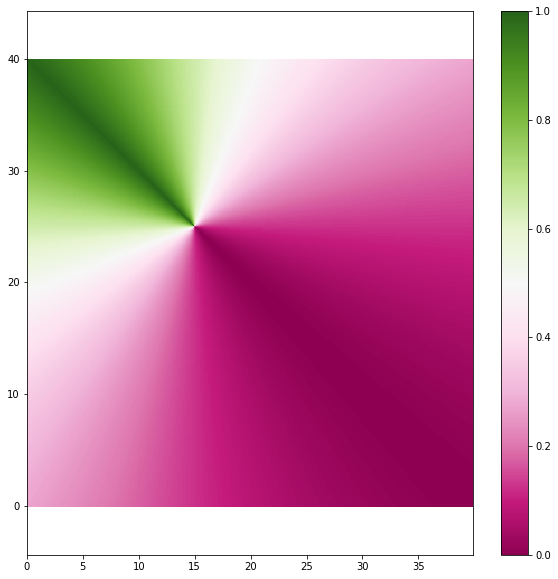

In [281]:
def f_reward(x, y):
    to_rwy_x = x_runway -x
    t_rwy_y = y_runway - y
    
    to_faf_x = x_faf - x
    to_faf_y = y_faf - y
    d_faf = np.hypot(to_faf_x, to_faf_y)
    d_rwy = np.hypot(to_rwy_x, t_rwy_y)
    
    reward_faf = 1/np.maximum(np.power(d_faf, 0.2),1)
    reward_rwy = 1/np.maximum(np.power(d_rwy, 0.1),1)
    
    angle_rwy = np.abs(np.degrees(np.arctan2(to_rwy_x, t_rwy_y)))
    angle_faf = np.degrees(np.arctan2(to_faf_x, to_faf_y))
    
    angle_rwy_rel = relative_angle(phi_runway, angle_rwy)
    
    reward_angle_rwy = 1 - np.abs(np.degrees(np.arctan2(to_rwy_x, t_rwy_y)))/180 * 1/np.maximum(np.power(d_faf, 0.5),1)
    reward_angle_faf = 1 - np.abs(np.degrees(np.arctan2(to_faf_x, to_faf_y)))/180 * 1/np.maximum(np.power(d_faf, 0.5),1)
    reward_app_sector = np.power(1 - np.abs(relative_angle(phi_runway, angle_faf))/180, 1.5)
    
    side_sign = np.sign(relative_angle(phi_plane, phi_runway))
    
    reward = relative_angle(angle_faf, phi_plane)
    
    reward = reward_app_sector
    
    return reward

x_faf = 15
y_faf = 25

phi_runway = 135
x_runway = 20
y_runway = 20

phi_plane = 90

x = np.arange(0, 40, 0.1)
y = np.arange(0, 40, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = f_reward(xx, yy)

plt.figure(figsize=(10,10))
plt.pcolormesh(x,y,z, cmap="PiYG")
plt.colorbar()
ax = plt.gca()
ax.set_aspect('equal', 'datalim')
plt.show()
